In [48]:
import pandas as pd
import numpy as np

X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_train_df = pd.DataFrame(y_train)


correlation_matrix = y_train_df.corr()

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)

print("X_train head:\n", pd.DataFrame(X_train).head())
print("y_train head:\n", pd.DataFrame(y_train).head())


X_train shape: (1000, 111)
X_test shape: (700, 111)
y_train shape: (1000, 11)
X_train head:
     0    1    2    3    4    5    6    7    8    9    ...  101  102  103  104  \
0  57.0  5.0  0.0  0.0  0.0  2.0  NaN  2.0  0.0  NaN  ...  3.0  0.0  0.0  3.0   
1  71.0  2.0  2.0  NaN  NaN  2.0  NaN  3.0  0.0  7.0  ...  5.0  NaN  NaN  4.0   
2  64.0  2.0  0.0  NaN  NaN  2.0  NaN  2.0  0.0  1.0  ...  4.0  0.0  3.0  2.0   
3  74.0  1.0  1.0  6.0  2.0  2.0  NaN  2.0  0.0  NaN  ...  4.0  0.0  3.0  3.0   
4  74.0  2.0  0.0  6.0  2.0  0.0  NaN  3.0  0.0  7.0  ...  6.0  0.0  5.0  4.0   

   105  106  107  108  109  110  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 111 columns]
y_train head:
    0   1   2   3   4   5   6   7   8   9   10
0   1   0   0   0   0   0   0   0   0   0   0
1   0   0   0   1   1   1   1   0   0   0   0
2   1   0   0   0   0   0   0   0   0  

In [49]:
# Find significant correlation between y_train vectors
from scipy.stats import pearsonr

y_train = np.load('y_train.npy')

correlation_matrix = np.zeros((11, 11))
p_values_matrix = np.zeros((11, 11))

for i in range(11):
    for j in range(11):
        if i != j:
            corr, p_val = pearsonr(y_train[:, i], y_train[:, j])
            correlation_matrix[i, j] = corr
            p_values_matrix[i, j] = p_val
        else:
            correlation_matrix[i, j] = 1
            p_values_matrix[i, j] = 0

for i in range(11):
    for j in range(11):
        if i != j:
            if p_values_matrix[i, j] < 0.05:
                print("corr and p:", correlation_matrix[i, j], p_values_matrix[i, j])
                print("i,j:",i,j)

corr and p: 0.08649579037501764 0.006201231733680003
i,j: 0 7
corr and p: 0.06260952807203975 0.047776280388924355
i,j: 2 3
corr and p: 0.06260952807203975 0.047776280388924355
i,j: 3 2
corr and p: 0.08649579037501764 0.006201231733680003
i,j: 7 0
corr and p: 0.07091826214393136 0.02491928754784615
i,j: 8 9
corr and p: 0.07091826214393136 0.02491928754784615
i,j: 9 8


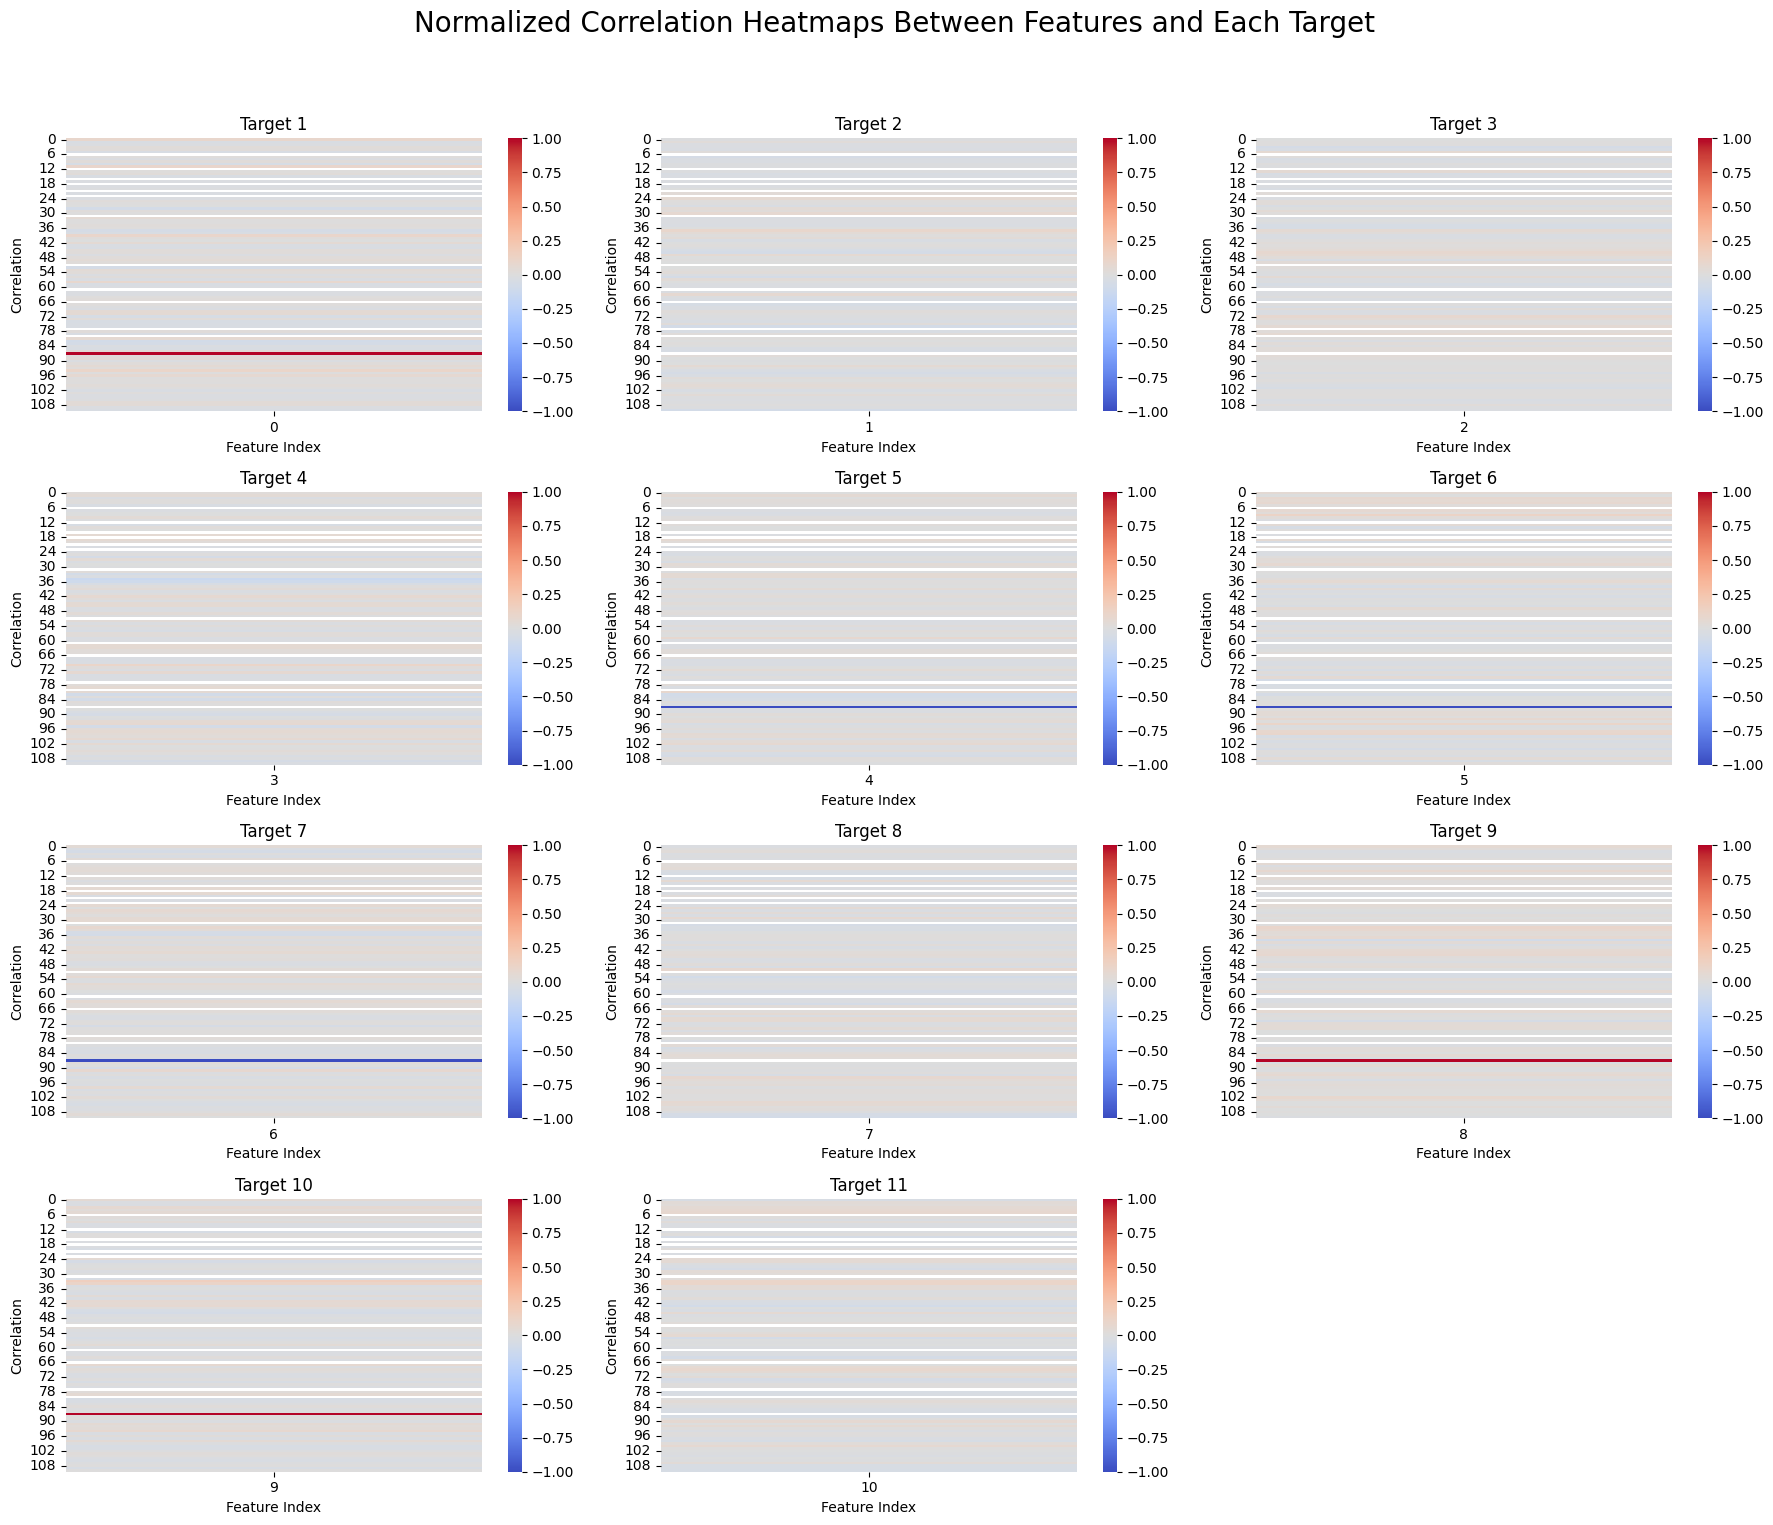

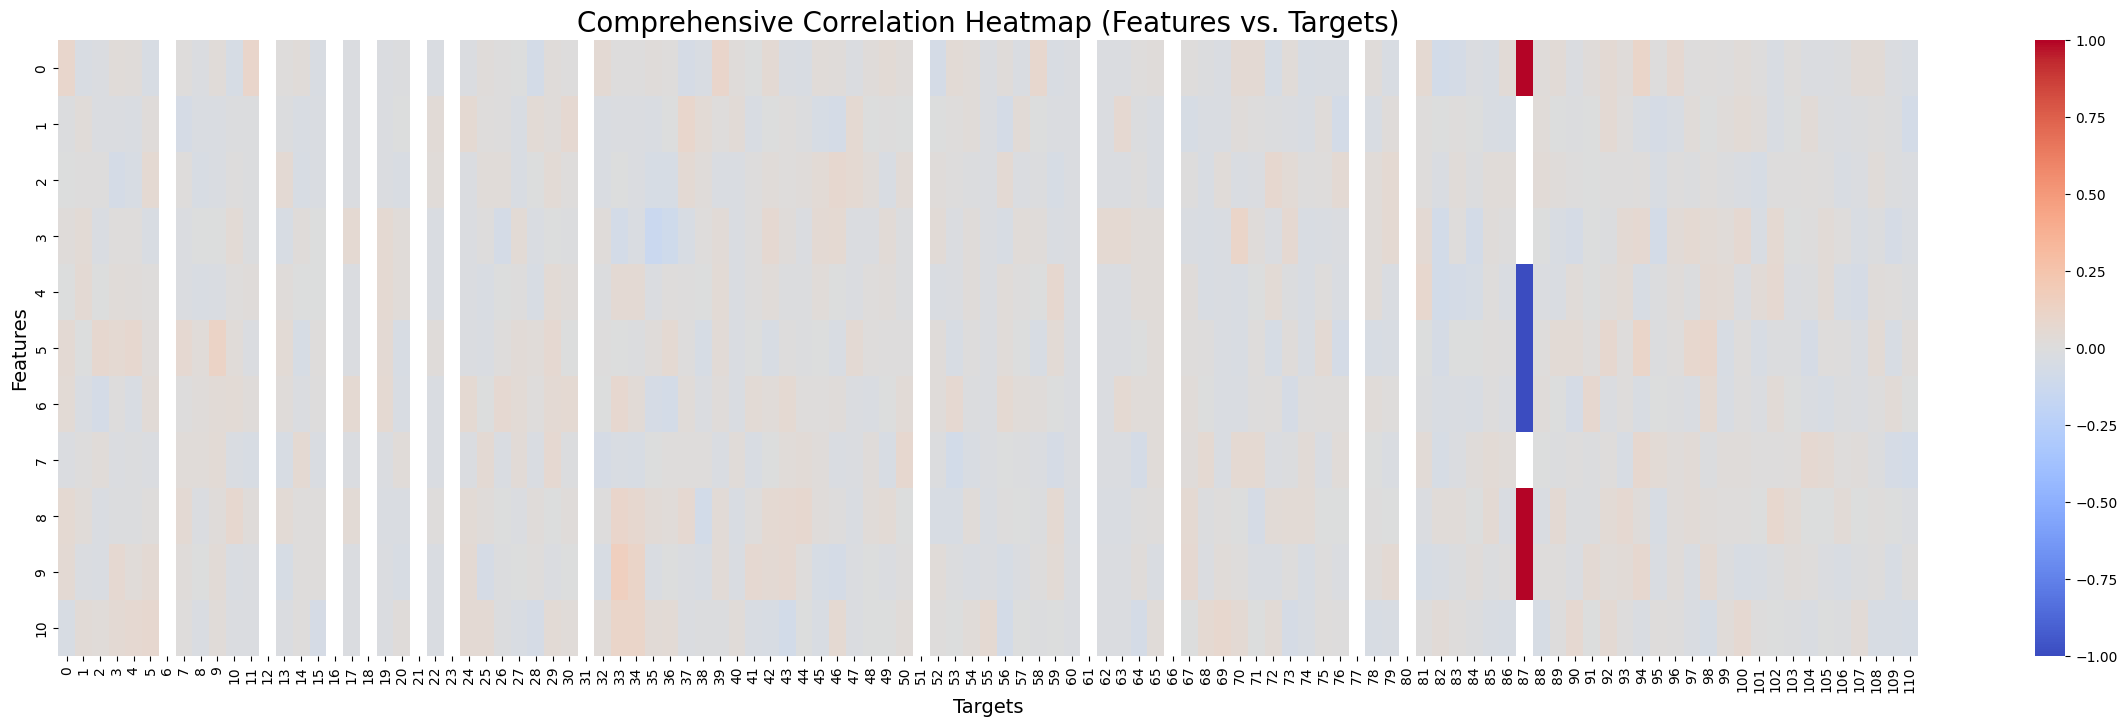

In [50]:
# Graph relation of features vs targets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')

df_features = pd.DataFrame(X_train)
df_targets = pd.DataFrame(y_train)

correlation_matrices = []

# Compute correlation matrix for each target
for i in range(df_targets.shape[1]):
    df = pd.concat([df_features, df_targets.iloc[:, i]], axis=1)
    correlation_matrix = df.corr()
    
    correlation_matrices.append(correlation_matrix.iloc[:-1, -1])

correlation_df = pd.DataFrame(correlation_matrices).T  # Transpose to have features as rows and targets as columns

correlation_df.head()


# Setup for multiple subplots with a consistent scale
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
fig.suptitle('Normalized Correlation Heatmaps Between Features and Each Target', fontsize=20)

# Plot each correlation as a heatmap with a fixed scale from -1 to 1
for i, ax in enumerate(axes.flatten()):
    if i < df_targets.shape[1]:  # Ensure no index error
        sns.heatmap(pd.DataFrame(correlation_df.iloc[:, i]), ax=ax, annot=False, cmap='coolwarm', cbar=True,
                    vmin=-1, vmax=1)  # Set vmin and vmax to ensure consistent scale
        ax.set_title(f'Target {i+1}')
        ax.set_xlabel('Feature Index')
        ax.set_ylabel('Correlation')
    else:
        ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

full_data = pd.concat([df_features, df_targets], axis=1)

# Calculate the full correlation matrix
full_correlation_matrix = full_data.corr()

# Extract the feature-target correlations from the full matrix
# This strips out the inter-feature and inter-target correlations, focusing on feature-target relationships
feature_target_correlation = full_correlation_matrix.iloc[:df_features.shape[1], -df_targets.shape[1]:]
feature_target_correlation_inverse = full_correlation_matrix.iloc[-df_targets.shape[1]:, :df_features.shape[1]]

# Plot the comprehensive feature vs target correlation matrix
plt.figure(figsize=(30, 8))  # Adjust size as necessary
sns.heatmap(feature_target_correlation_inverse, annot=False, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Comprehensive Correlation Heatmap (Features vs. Targets)', fontsize=20)
plt.xlabel('Targets', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()


In [55]:
# Remove certain features
import numpy as np
import pandas as pd

# Load the dataset
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')

# Convert to DataFrame for easier manipulation
df_features_train = pd.DataFrame(X_train)
df_features_test = pd.DataFrame(X_test)

# Drop weird column
df_features_train.drop(columns=[87], inplace=True)
df_features_test.drop(columns=[87], inplace=True)

# Remove columns that only contain one unique value or are all NaNs
colmn_to_drop = df_features_train.nunique(dropna=False) > 2
df_cleaned_train = df_features_train.loc[:, colmn_to_drop]
df_cleaned_test = df_features_test.loc[:, colmn_to_drop]


# Convert back to numpy array
df_cleaned_train = df_cleaned_train.to_numpy()
df_cleaned_test = df_cleaned_test.to_numpy()

# Save the cleaned data to a npy file
np.save('X_train_cleaned.npy', df_cleaned_train)
np.save('X_test_cleaned.npy', df_cleaned_test)

In [52]:
# clean the x_train NaN
import pandas as pd
import numpy as np

X_train = np.load('X_train_cleaned.npy')
X_test = np.load('X_test_cleaned.npy')
df_xtrain = pd.DataFrame(X_train)
df_xtest = pd.DataFrame(X_test)

df_xtrain = df_xtrain.fillna(df_xtrain.mean())
df_xtest = df_xtest.fillna(df_xtest.mean())
X_train_filled = df_xtrain.to_numpy()
X_test_filled = df_xtest.to_numpy()
# 保存为.npy文件
np.save('X_train_filled.npy', X_train_filled)
np.save('X_test_filled.npy', X_test_filled)

In [1]:
# Normalize the data
import pandas as pd
import numpy as np

X_train = np.load('X_train_filled.npy')
X_test = np.load('X_test_filled.npy')

for i in range(X_train.shape[1]):
    X_train[:, i] = (X_train[:, i] - np.min(X_train[:, i])) / (np.max(X_train[:, i]) - np.min(X_train[:, i]))
    X_test[:, i] = (X_test[:, i] - np.min(X_test[:, i])) / (np.max(X_test[:, i]) - np.min(X_test[:, i]))

np.save('../X_train_normalized.npy', X_train)
np.save('../X_test_normalized.npy', X_test)

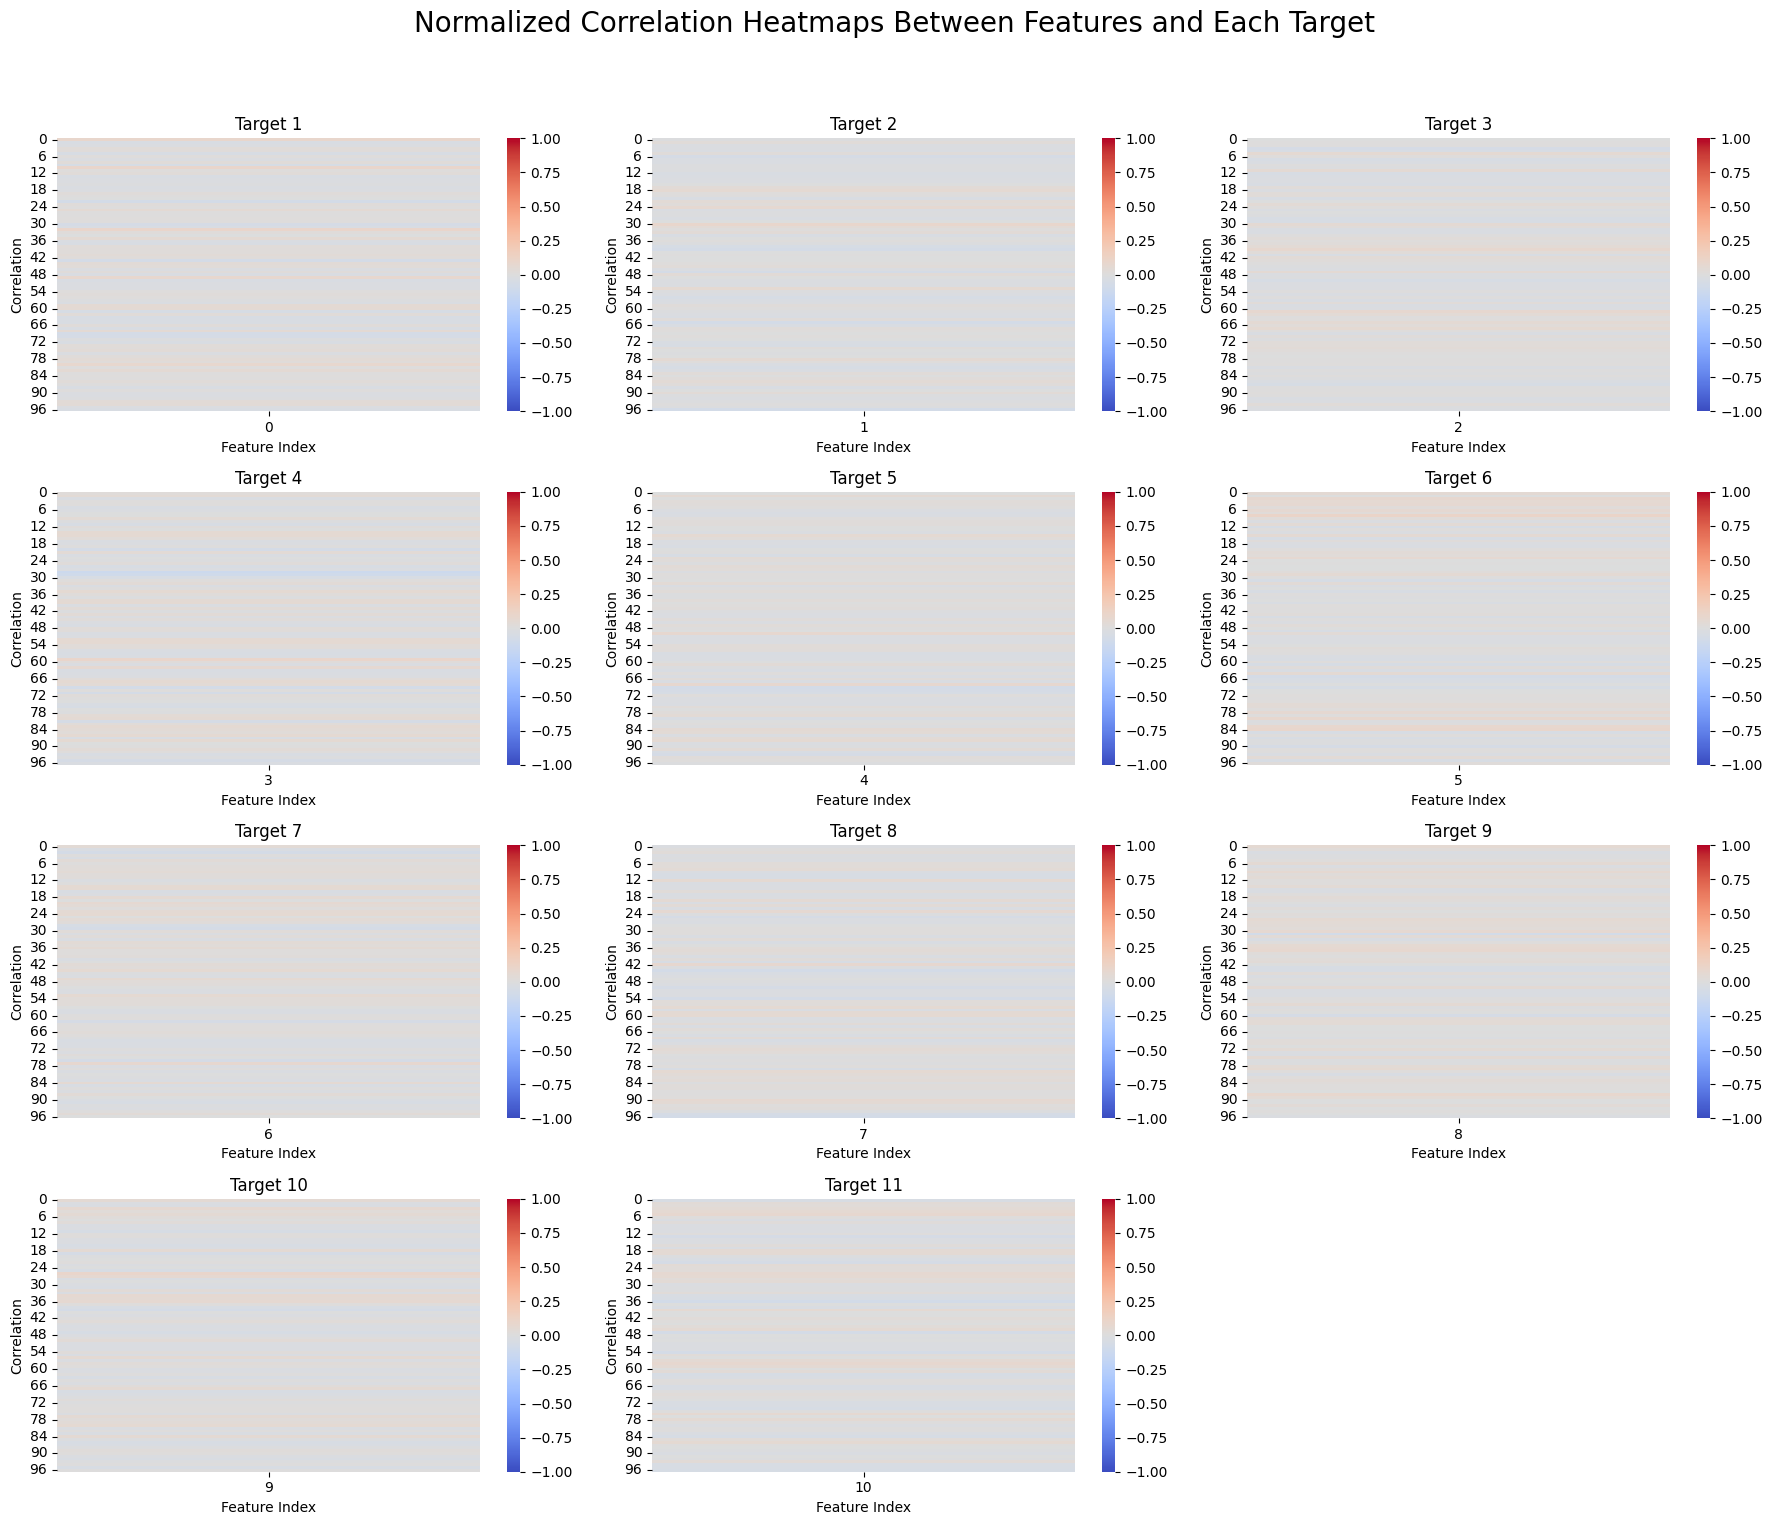

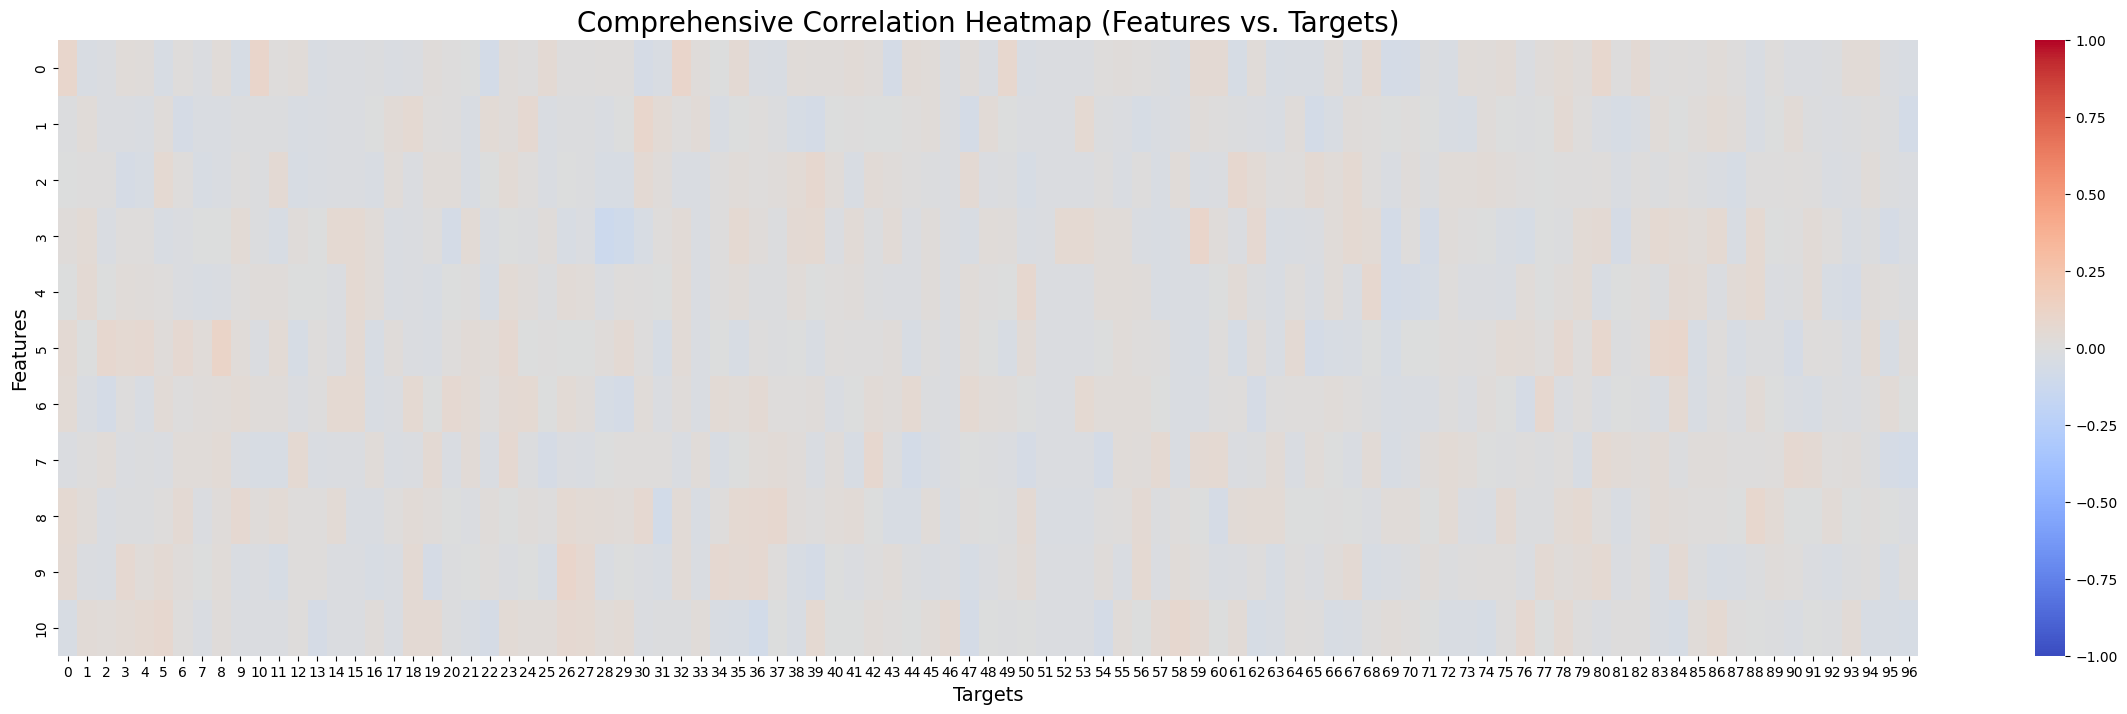

In [54]:
# Graph relation of features vs targets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X_train = np.load('X_train_normalized.npy')
X_test = np.load('X_test_normalized.npy')
y_train = np.load('y_train.npy')

df_features = pd.DataFrame(X_train)
df_targets = pd.DataFrame(y_train)

correlation_matrices = []

# Compute correlation matrix for each target
for i in range(df_targets.shape[1]):
    df = pd.concat([df_features, df_targets.iloc[:, i]], axis=1)
    correlation_matrix = df.corr()
    
    correlation_matrices.append(correlation_matrix.iloc[:-1, -1])

correlation_df = pd.DataFrame(correlation_matrices).T  # Transpose to have features as rows and targets as columns

correlation_df.head()


# Setup for multiple subplots with a consistent scale
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
fig.suptitle('Normalized Correlation Heatmaps Between Features and Each Target', fontsize=20)

# Plot each correlation as a heatmap with a fixed scale from -1 to 1
for i, ax in enumerate(axes.flatten()):
    if i < df_targets.shape[1]:  # Ensure no index error
        sns.heatmap(pd.DataFrame(correlation_df.iloc[:, i]), ax=ax, annot=False, cmap='coolwarm', cbar=True,
                    vmin=-1, vmax=1)  # Set vmin and vmax to ensure consistent scale
        ax.set_title(f'Target {i+1}')
        ax.set_xlabel('Feature Index')
        ax.set_ylabel('Correlation')
    else:
        ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

full_data = pd.concat([df_features, df_targets], axis=1)

# Calculate the full correlation matrix
full_correlation_matrix = full_data.corr()

# Extract the feature-target correlations from the full matrix
# This strips out the inter-feature and inter-target correlations, focusing on feature-target relationships
feature_target_correlation = full_correlation_matrix.iloc[:df_features.shape[1], -df_targets.shape[1]:]
feature_target_correlation_inverse = full_correlation_matrix.iloc[-df_targets.shape[1]:, :df_features.shape[1]]

# Plot the comprehensive feature vs target correlation matrix
plt.figure(figsize=(30, 8))  # Adjust size as necessary
sns.heatmap(feature_target_correlation_inverse, annot=False, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Comprehensive Correlation Heatmap (Features vs. Targets)', fontsize=20)
plt.xlabel('Targets', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()
